# Spectogram Image Classification

![Spectogram](https://i.imgur.com/UtoD5Pv.png)

## Imports

In [16]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from numpy import load
from keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


## Constants

In [17]:
Tx = 1998
Nfreq = 101

## Load the data

In [18]:
real_data = load('data/real.npz')
fake_data = load('data/fake.npz')

real_labels = np.ones((real_data['x'].shape[0], 1))
fake_labels = np.zeros((fake_data['x'].shape[0], 1))

## Data Visualization

C:\Users\misho\AppData\Local\Temp\ipykernel_24872\1532282367.py:1: RuntimeWarning: invalid value encountered in cast
  real_images = x = np.array(real_data['x'], dtype=np.uint8)
C:\Users\misho\AppData\Local\Temp\ipykernel_24872\1532282367.py:2: RuntimeWarning: invalid value encountered in cast
  fake_images = x = np.array(fake_data['x'], dtype=np.uint8)


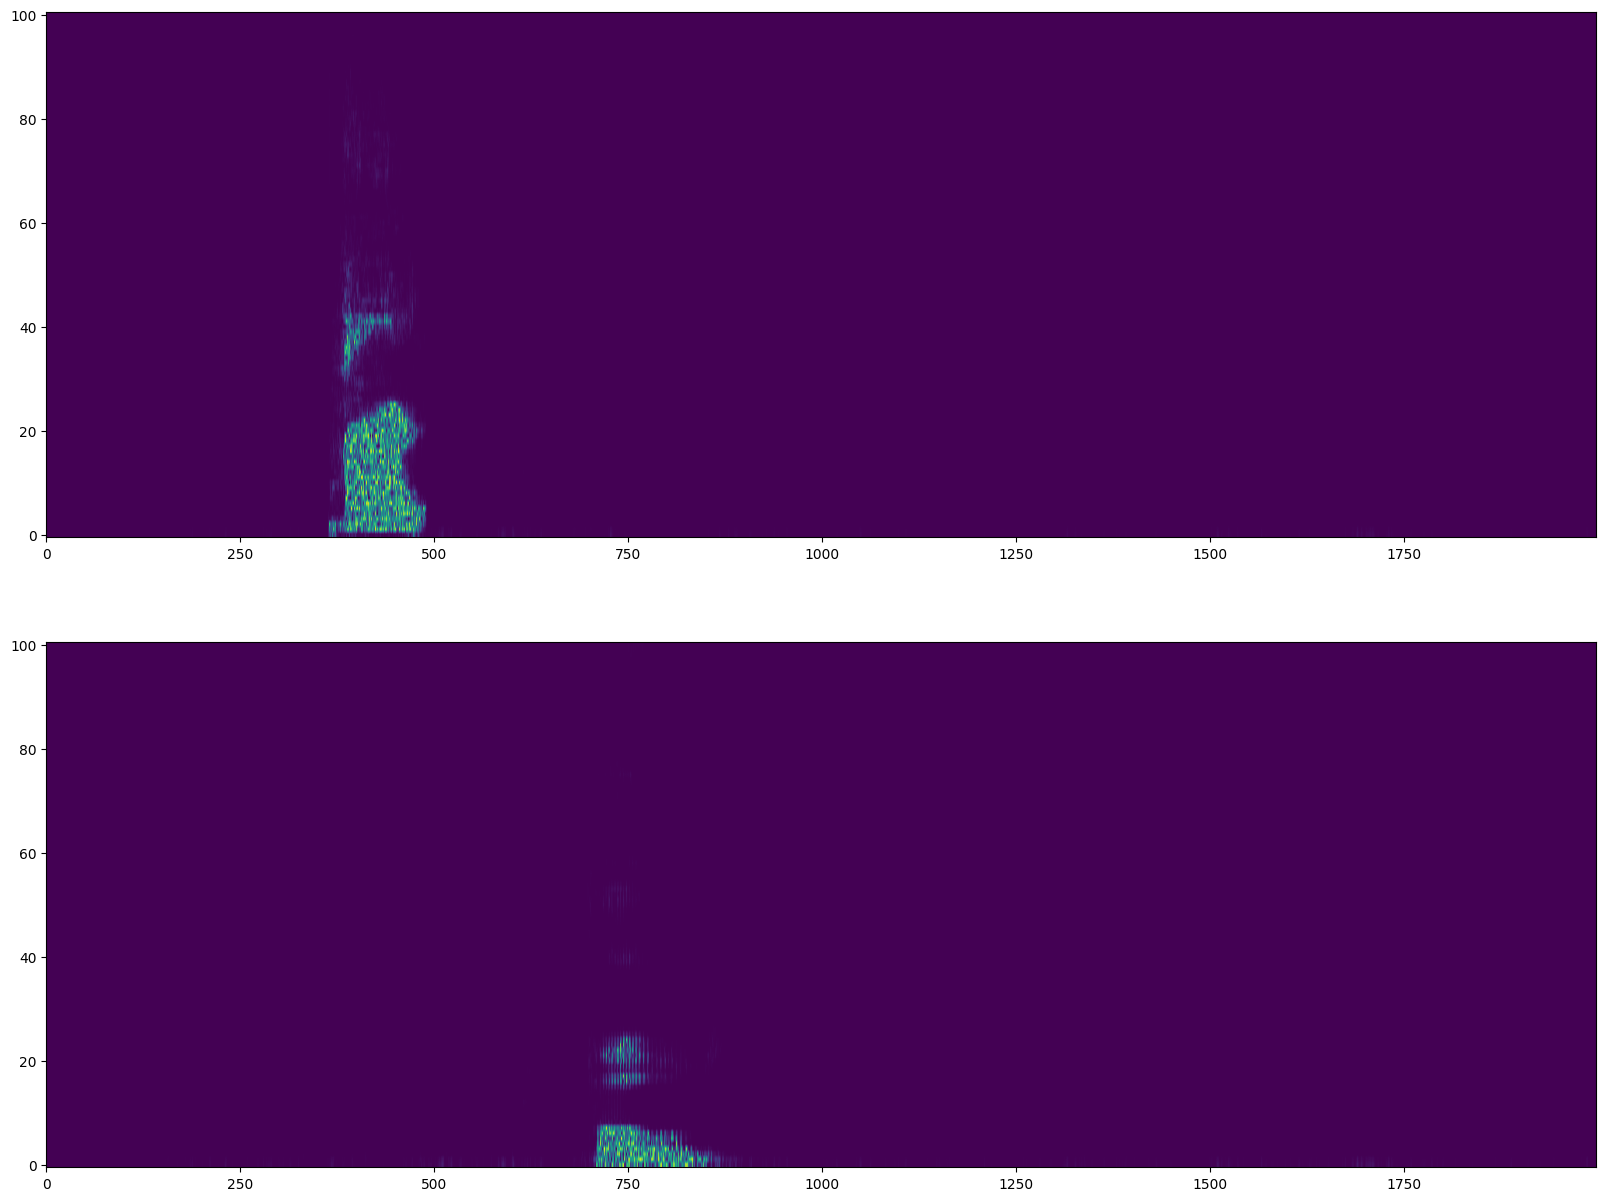

In [31]:
real_images = x = np.array(real_data['x'], dtype=np.uint8)
fake_images = x = np.array(fake_data['x'], dtype=np.uint8)

real_image = np.transpose(real_images[0])
fake_image = np.transpose(fake_images[0])

fig, ax = plt.subplots(2, 1, figsize=(20, 15))
ax[0].imshow(real_image, aspect='auto', cmap = 'viridis', origin='lower')
ax[1].imshow(fake_image, aspect='auto', cmap = 'viridis',origin='lower')
plt.show()


## Merge the data

In [20]:
data = np.concatenate((real_data['x'], fake_data['x']))
labels = np.concatenate((real_labels, fake_labels))

## Shuffle the data

In [21]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

## Data Preprocessing

### Process NaN values

In [22]:
spectrograms = np.nan_to_num(data)

### Scale the data

In [23]:
scaler = MinMaxScaler()
spectrograms_scaled = scaler.fit_transform(spectrograms.reshape(-1, Tx * Nfreq)).reshape(-1, Tx, Nfreq, 1)

## Save the scaler 

In [24]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Split the data to train-validation-test

In [25]:
X_train , X_test, y_train, y_test = train_test_split(spectrograms_scaled, labels, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Model Architecture

In [26]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(Tx, Nfreq, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

## Model Compilation

In [27]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

##  Model Training

In [28]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
30/30 [==============================] - 204s 5s/step - loss: 0.6313 - accuracy: 0.6510 - val_loss: 0.5184 - val_accuracy: 0.7917
Epoch 2/10
30/30 [==============================] - 87s 3s/step - loss: 0.3372 - accuracy: 0.8875 - val_loss: 0.3787 - val_accuracy: 0.8625
Epoch 3/10
30/30 [==============================] - 89s 3s/step - loss: 0.1328 - accuracy: 0.9448 - val_loss: 0.5199 - val_accuracy: 0.8625
Epoch 4/10
30/30 [==============================] - 89s 3s/step - loss: 0.0829 - accuracy: 0.9667 - val_loss: 0.4037 - val_accuracy: 0.8833
Epoch 5/10
30/30 [==============================] - 92s 3s/step - loss: 0.0240 - accuracy: 0.9917 - val_loss: 0.5842 - val_accuracy: 0.8708
Epoch 6/10
30/30 [==============================] - 90s 3s/step - loss: 0.0099 - accuracy: 0.9990 - val_loss: 0.6952 - val_accuracy: 0.8708
Epoch 7/10
30/30 [==============================] - 90s 3s/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.7239 - val_accuracy: 0.8875
Epoch 8/10
30/30 [=

## Model Evaluation

In [29]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

10/10 [==============================] - 4s 435ms/step - loss: 0.9275 - accuracy: 0.8900
Test accuracy: 0.8899999856948853


## Save the model

In [30]:
model.save('model.h5')

C:\Users\misho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
